In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torchtext.data.utils import get_tokenizer
from spacy.lang.ar import Arabic

In [28]:
plt.rcParams['image.cmap'] = 'Dark2'

In [12]:
arabic = Arabic()

In [14]:
en_tokenizer = get_tokenizer('basic_english', language='en')
ar_tokenizer = lambda x: list(arabic(x))

In [5]:
df = pd.read_csv("../data/ar-en.txt", sep="\t", header=None, names=['english', 'arabic', 'license'])

df.head()

,english,arabic,license
0,Hi.,مرحبًا.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
1,Run!,اركض!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
2,Duck!,اخفض رأسك!,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
3,Duck!,اخفضي رأسك!,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
4,Duck!,اخفضوا رؤوسكم!,CC-BY 2.0 (France) Attribution: tatoeba.org #2...


In [32]:
df['en_len'] = df['english'].apply(lambda x: len(en_tokenizer(x)))
df['ar_len'] = df['arabic'].apply(lambda x: len(ar_tokenizer(x)))

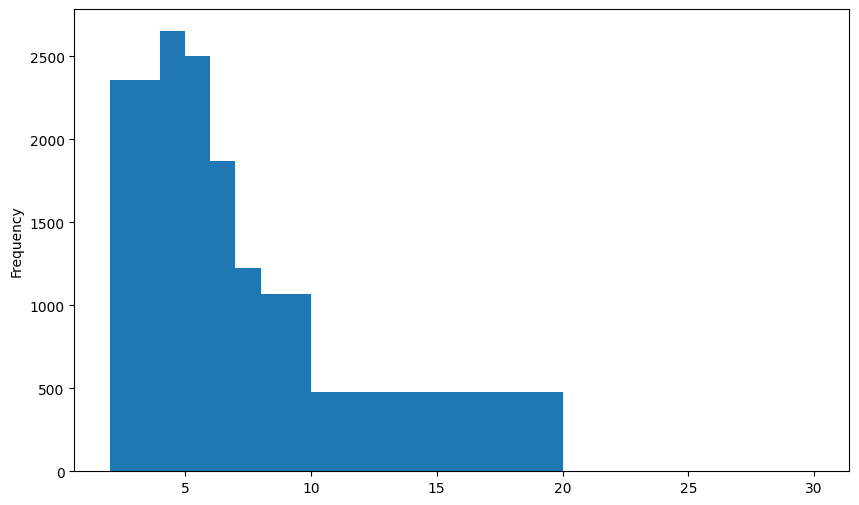

In [42]:
plt.figure(figsize=(10, 6))
df['ar_len'].plot(kind='hist', bins=[2, 4, 5, 6, 7, 8, 10, 20, 30])
plt.show()

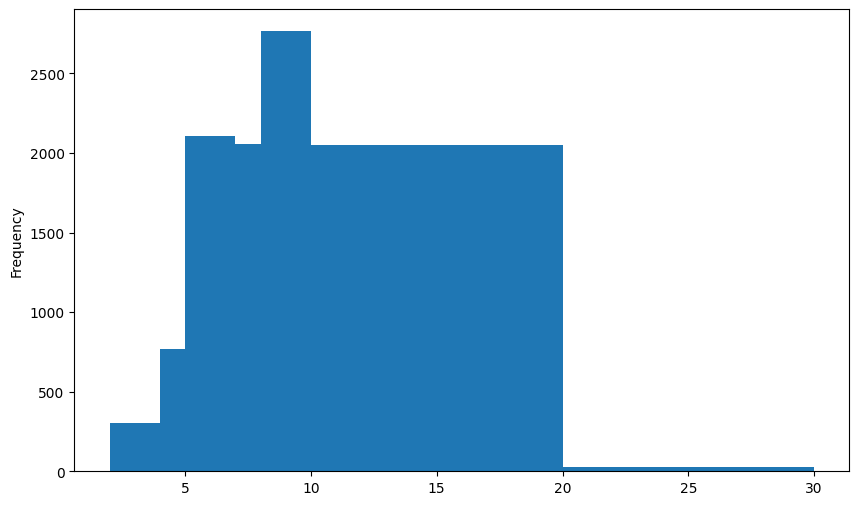

In [40]:
plt.figure(figsize=(10, 6))
df['en_len'].plot(kind='hist', bins=[2, 4, 5, 6, 7, 8, 10, 20, 30])
plt.show()

<Figure size 1200x600 with 0 Axes>

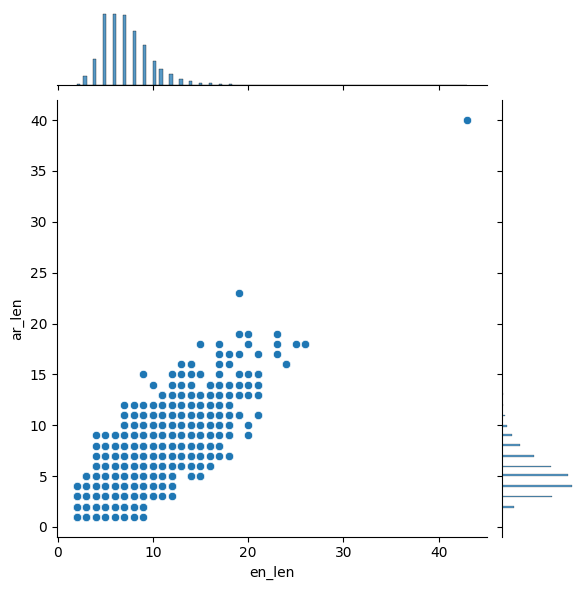

In [37]:
plt.figure(figsize=(12, 6))
sns.jointplot(x='en_len', y='ar_len', data=df)
plt.show()